In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [4]:
train.tail()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0
26495,34895,2017-06-23 23:00:00,-2.1,-11.4,1009.0,71.880,A,210.0


In [5]:
train.shape, test.shape

((26496, 8), (8568, 7))

In [6]:
test[0:50]

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A
5,557,2013-07-24 05:00:00,-10.7,-20.0,1009.0,2.915,A
6,558,2013-07-24 06:00:00,-12.1,-20.7,997.0,6.295,A
7,559,2013-07-24 07:00:00,-15.7,-17.9,1003.0,8.675,A
8,560,2013-07-24 08:00:00,-12.9,-17.1,996.0,12.180,A
9,561,2013-07-24 09:00:00,-10.0,-19.3,999.0,2.140,A


In [7]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [8]:
train.set_index('datetime', inplace=True)

In [9]:
train.head()

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption
datetime,,,,,,,
2013-07-01 00:00:00,0,-11.4,-17.1,1003.0,571.910,A,216.0
2013-07-01 01:00:00,1,-12.1,-19.3,996.0,575.040,A,210.0
2013-07-01 02:00:00,2,-12.9,-20.0,1000.0,578.435,A,225.0
2013-07-01 03:00:00,3,-11.4,-17.1,995.0,582.580,A,216.0
2013-07-01 04:00:00,4,-11.4,-19.3,1005.0,586.600,A,222.0


e:\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


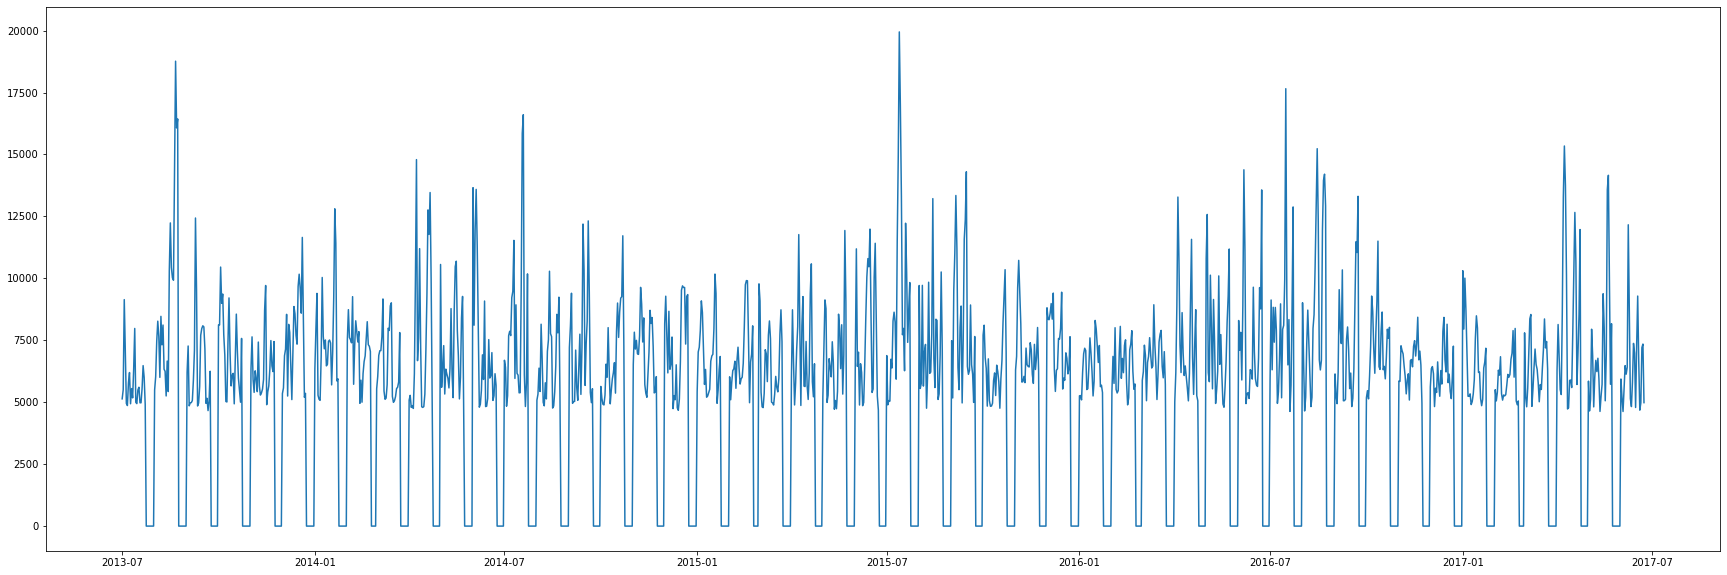

In [10]:
plt.figure(figsize=(30,10))
plt.plot(train['electricity_consumption'].resample('1D').sum())

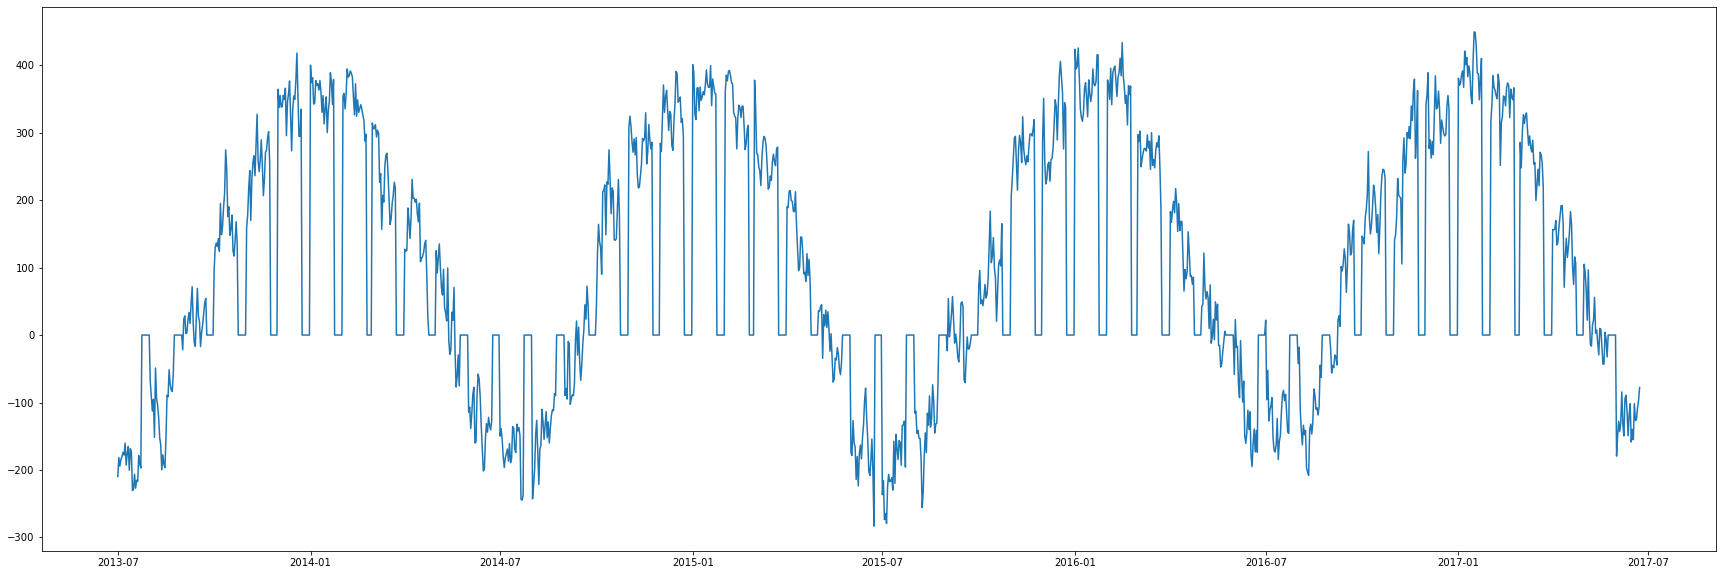

In [11]:
plt.figure(figsize=(30,10))
plt.plot(train['temperature'].resample('1D').sum())

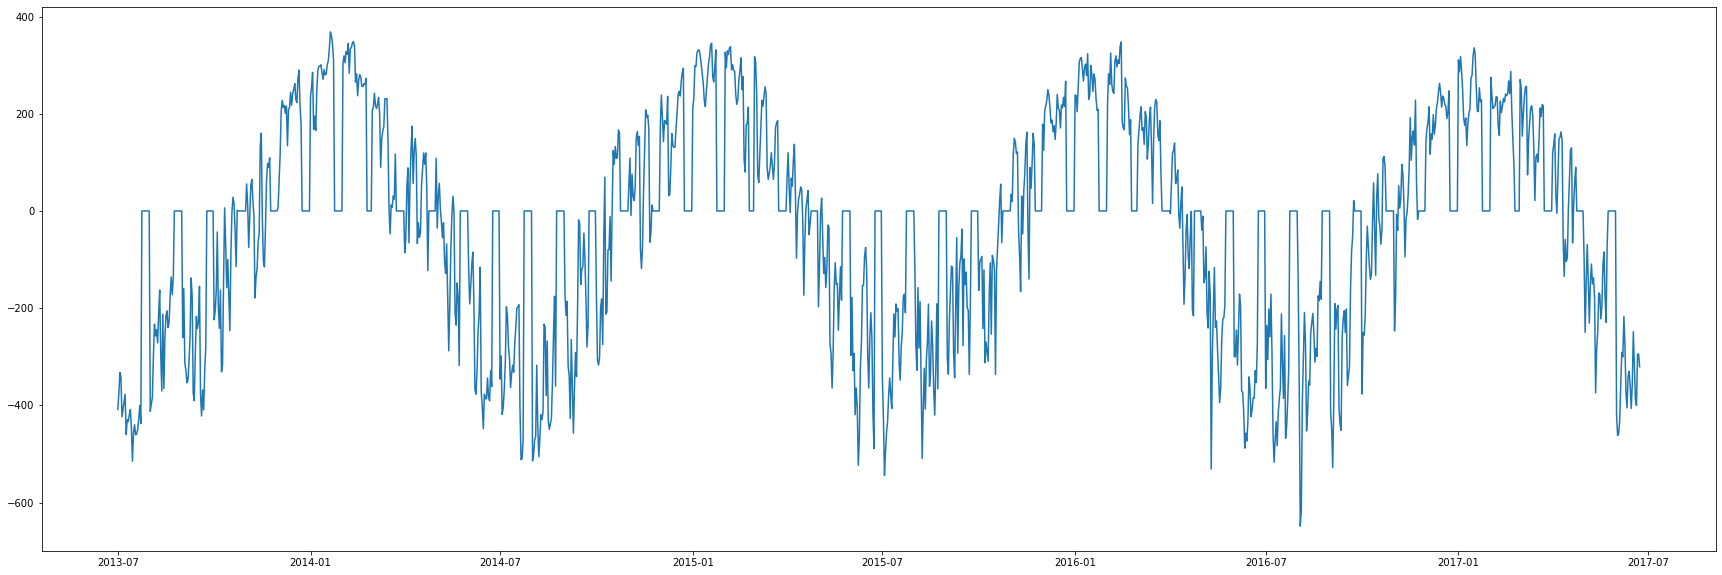

In [13]:
plt.figure(figsize=(30,10))
plt.plot(train['var1'].resample('1D').sum())

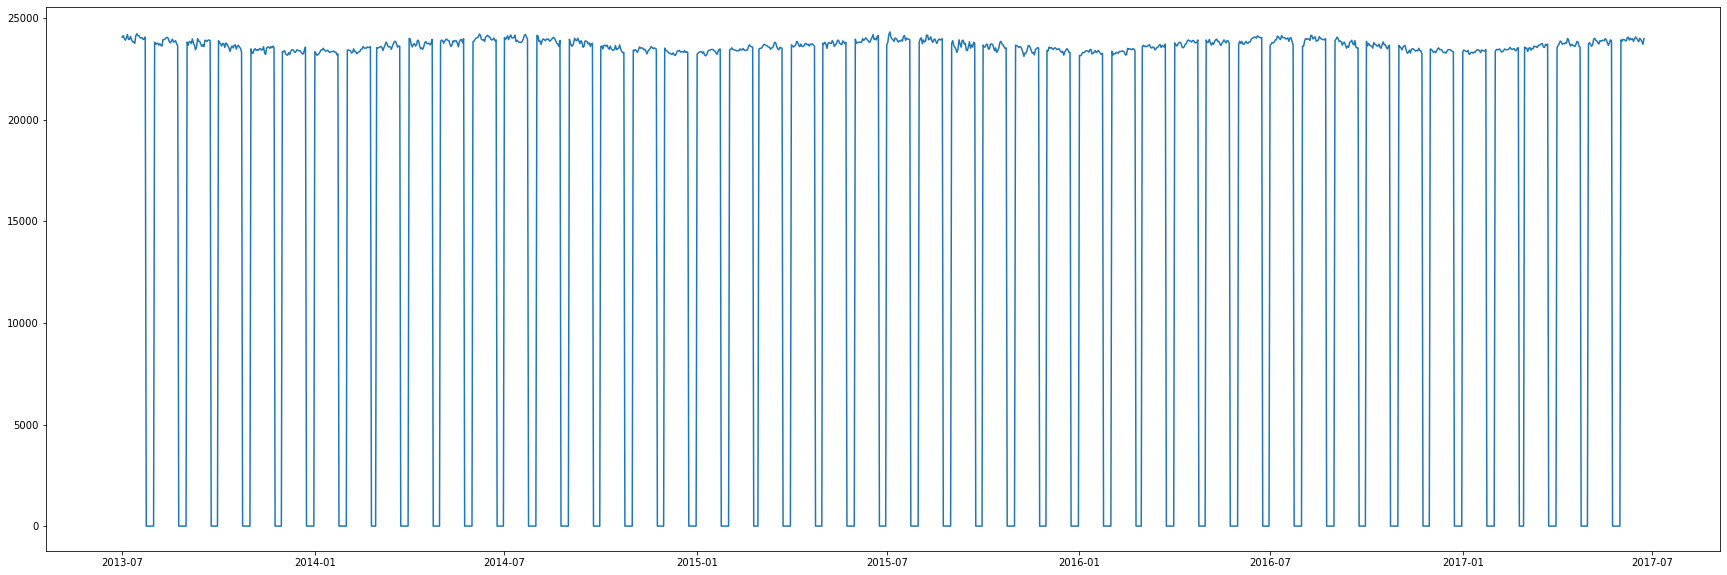

In [14]:
plt.figure(figsize=(30,10))
plt.plot(train['pressure'].resample('1D').sum())

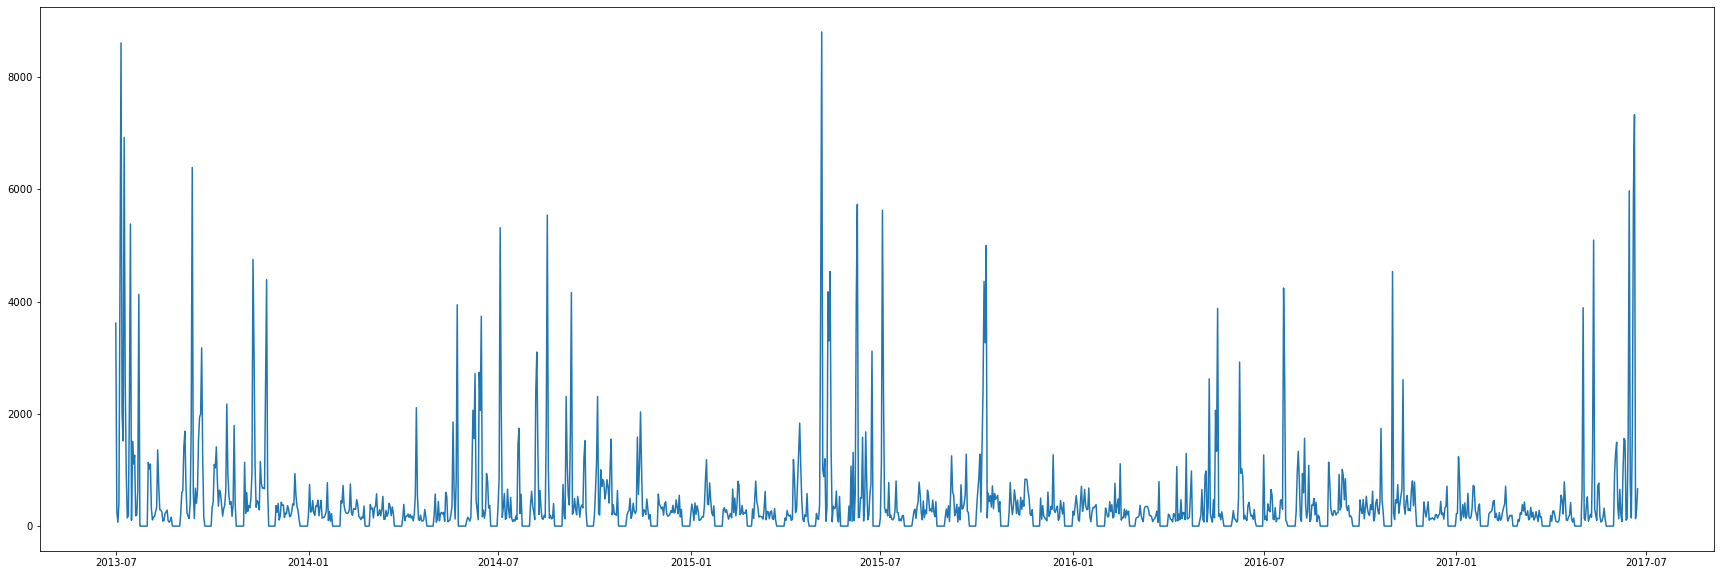

In [15]:
plt.figure(figsize=(30,10))
plt.plot(train['windspeed'].resample('1D').sum())

In [12]:
train.columns

Index(['ID', 'temperature', 'var1', 'pressure', 'windspeed', 'var2',
       'electricity_consumption'],
      dtype='object')

In [15]:
train.var2.value_counts()

A    25239
C     1040
B      217
Name: var2, dtype: int64

In [16]:
train.corr()

,ID,temperature,var1,pressure,windspeed,electricity_consumption
ID,1.000000,0.074134,0.055589,-0.011708,-0.081535,-0.009491
temperature,0.074134,1.000000,0.811421,-0.723939,-0.162093,-0.117254
var1,0.055589,0.811421,1.000000,-0.680821,-0.292305,0.133914
pressure,-0.011708,-0.723939,-0.680821,1.000000,0.171369,0.000907
windspeed,-0.081535,-0.162093,-0.292305,0.171369,1.000000,-0.238883
electricity_consumption,-0.009491,-0.117254,0.133914,0.000907,-0.238883,1.000000


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [18]:
log = LogisticRegression()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(train[['electricity_consumption']], train['var2'], test_size=0.33, random_state=42)

In [20]:
log.fit(X_train, y_train)

C:\Users\EW\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\EW\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
f1_score(y_test, log.predict(X_test), average='micro')

0.9502516010978957

In [22]:
train = train.reset_index()

In [23]:
train.head()

,datetime,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,2013-07-01 00:00:00,0,-11.4,-17.1,1003.0,571.910,A,216.0
1,2013-07-01 01:00:00,1,-12.1,-19.3,996.0,575.040,A,210.0
2,2013-07-01 02:00:00,2,-12.9,-20.0,1000.0,578.435,A,225.0
3,2013-07-01 03:00:00,3,-11.4,-17.1,995.0,582.580,A,216.0
4,2013-07-01 04:00:00,4,-11.4,-19.3,1005.0,586.600,A,222.0


In [24]:
IQR = 3*(342 -219)
IQRu = 342+IQR
IQRl = 219 - IQR

In [25]:
train = train[(train['electricity_consumption']<=IQRu) & (train['electricity_consumption']>=IQRl)].reset_index(drop=True)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import lightgbm
import catboost
from sklearn.preprocessing import LabelEncoder, StandardScaler
la = LabelEncoder()
nom = StandardScaler()

In [38]:
train['day'] = train['datetime'].apply(lambda x: x.dayofyear)
train['hour'] = train['datetime'].apply(lambda x: x.hour)
train['month'] = train['datetime'].apply(lambda x: x.month)
train['year'] = train['datetime'].apply(lambda x: x.year)
train['week'] = train['datetime'].apply(lambda x: x.weekofyear)
train['var2_enc'] = la.fit_transform(train['var2'])

In [39]:
a = train['datetime'].iloc[0]

In [40]:
X = ['temperature', 'var1', 'pressure', 'windspeed',
       'var2_enc', 'day', 'hour', 'month', 'year', 'week']

In [41]:
X_train, X_test, y_train, y_test = train_test_split((train[X]), train['electricity_consumption'], test_size=0.33, random_state=42)

In [42]:
lgt = lightgbm.LGBMRegressor()
cat = catboost.CatBoostRegressor(silent=True, allow_writing_files=False)
rf = RandomForestRegressor()

In [43]:
lgt.fit(X_train, y_train)
rf.fit(X_train, y_train)
cat.fit(X_train, y_train)

C:\Users\EW\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
lgt_pred = lgt.predict(X_test)
rf_pred = rf.predict(X_test)
cat_pred = cat.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test, lgt_pred)), np.sqrt(mean_squared_error(y_test, rf_pred)), np.sqrt(mean_squared_error(y_test, cat_pred))

(59.34024637191588, 57.66114750325157, 56.69975671219661)

In [224]:
test.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,day,hour,month,year,var2_enc,electricity_consumption
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A,205,0,7,2013,0,207.019072
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A,205,1,7,2013,0,200.272923
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A,205,2,7,2013,0,199.226488
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A,205,3,7,2013,0,199.954340
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A,205,4,7,2013,0,229.004238


In [47]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [48]:
# test['datetime'] = pd.to_datetime(test['datetime'])
test['day'] = test['datetime'].apply(lambda x: x.dayofyear)
test['hour'] = test['datetime'].apply(lambda x: x.hour)
test['month'] = test['datetime'].apply(lambda x: x.month)
test['year'] = test['datetime'].apply(lambda x: x.year)
test['week'] = test['datetime'].apply(lambda x: x.weekofyear)
test['var2_enc'] = la.transform(test['var2'])

In [49]:
test_pred = cat.predict(test[X])

In [50]:
test['electricity_consumption'] = test_pred

In [51]:
test[['ID', 'electricity_consumption']].to_csv('cat_subn_out.csv', index=False)

In [52]:
test

,ID,datetime,temperature,var1,pressure,windspeed,var2,day,hour,month,year,week,var2_enc,electricity_consumption
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A,205,0,7,2013,30,0,227.966368
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A,205,1,7,2013,30,0,227.900778
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A,205,2,7,2013,30,0,243.737426
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A,205,3,7,2013,30,0,234.646055
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A,205,4,7,2013,30,0,266.822408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8563,35059,2017-06-30 19:00:00,-5.7,-18.6,998.0,233.595,A,181,19,6,2017,26,0,199.148093
8564,35060,2017-06-30 20:00:00,-5.7,-17.1,995.0,238.780,A,181,20,6,2017,26,0,206.021115
8565,35061,2017-06-30 21:00:00,-7.1,-19.3,1004.0,244.325,A,181,21,6,2017,26,0,188.938313
8566,35062,2017-06-30 22:00:00,-6.4,-19.3,1008.0,247.470,A,181,22,6,2017,26,0,183.046023


In [156]:
train.describe()

,ID,temperature,var1,pressure,windspeed,electricity_consumption,day,hour,month,year,var2_enc
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,17455.500000,5.098989,-1.916233,986.450615,23.959956,298.359601,178.708333,11.500000,6.500000,2015.000000,0.086692
std,10122.873673,8.682860,10.424860,12.002647,48.280321,108.020555,105.284139,6.922317,3.452118,1.224768,0.397096
min,0.000000,-17.100000,-32.900000,953.000000,1.075000,174.000000,1.000000,0.000000,1.000000,2013.000000,0.000000
25%,8717.750000,-2.900000,-10.700000,978.000000,3.155000,219.000000,89.000000,5.750000,3.750000,2014.000000,0.000000
50%,17435.500000,6.400000,-1.400000,986.000000,6.545000,267.000000,178.500000,11.500000,6.500000,2015.000000,0.000000
75%,26177.250000,12.100000,7.900000,995.000000,22.260000,342.000000,268.750000,17.250000,9.250000,2016.000000,0.000000
max,34895.000000,23.600000,18.600000,1024.000000,586.600000,1386.000000,358.000000,23.000000,12.000000,2017.000000,2.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x167917dd080>,
 'caps': [<matplotlib.lines.Line2D at 0x167917dd940>,
 'boxes': [<matplotlib.lines.Line2D at 0x167917dbef0>],
 'medians': [<matplotlib.lines.Line2D at 0x167918071d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x167918075f8>],
 'means': []}

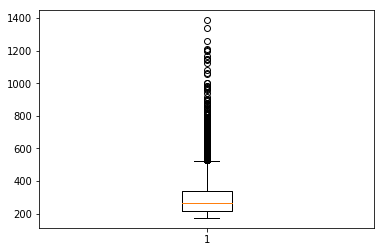

In [157]:
plt.boxplot(train['electricity_consumption'])

e:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


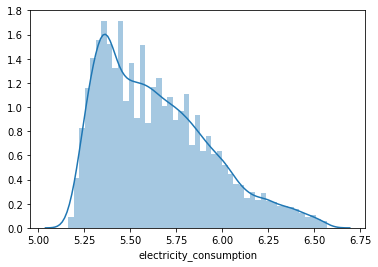

In [195]:
sns.distplot(np.log1p(train['electricity_consumption']))

In [214]:
from mlxtend.regressor import StackingRegressor


lgt = lightgbm.LGBMRegressor()
cat = catboost.CatBoostRegressor()
rf = RandomForestRegressor(n_estimators=300)
cat2 = catboost.CatBoostRegressor()

stregr = StackingRegressor(regressors=[rf, cat, lgt], 
                           meta_regressor=cat2)

In [208]:
stregr.fit(X_train, y_train)

Learning rate set to 0.065052
0:	learn: 97.5467272	total: 15.4ms	remaining: 15.4s
1:	learn: 95.9872849	total: 23ms	remaining: 11.5s
2:	learn: 94.5948218	total: 28.8ms	remaining: 9.56s
3:	learn: 93.3516451	total: 34.2ms	remaining: 8.51s
4:	learn: 92.2198150	total: 39.6ms	remaining: 7.88s
5:	learn: 91.1774439	total: 45.1ms	remaining: 7.47s
6:	learn: 90.2154280	total: 50.4ms	remaining: 7.15s
7:	learn: 89.3615276	total: 55.9ms	remaining: 6.94s
8:	learn: 88.5769627	total: 61.6ms	remaining: 6.78s
9:	learn: 87.8244020	total: 66.9ms	remaining: 6.62s
10:	learn: 87.1194205	total: 72.7ms	remaining: 6.54s
11:	learn: 86.2380390	total: 78ms	remaining: 6.42s
12:	learn: 85.5545144	total: 83.5ms	remaining: 6.34s
13:	learn: 84.8045560	total: 88.8ms	remaining: 6.25s
14:	learn: 84.3204138	total: 94.5ms	remaining: 6.2s
15:	learn: 83.7481418	total: 99.9ms	remaining: 6.14s
16:	learn: 83.2298525	total: 105ms	remaining: 6.09s
17:	learn: 82.7416483	total: 110ms	remaining: 6.03s
18:	learn: 82.2347796	total: 116m

159:	learn: 65.9771916	total: 888ms	remaining: 4.66s
160:	learn: 65.9372516	total: 894ms	remaining: 4.66s
161:	learn: 65.9072665	total: 899ms	remaining: 4.65s
162:	learn: 65.8407561	total: 904ms	remaining: 4.64s
163:	learn: 65.7439077	total: 910ms	remaining: 4.64s
164:	learn: 65.7015165	total: 915ms	remaining: 4.63s
165:	learn: 65.6754868	total: 920ms	remaining: 4.62s
166:	learn: 65.6391634	total: 925ms	remaining: 4.62s
167:	learn: 65.5982304	total: 930ms	remaining: 4.61s
168:	learn: 65.5787312	total: 936ms	remaining: 4.6s
169:	learn: 65.5510501	total: 941ms	remaining: 4.59s
170:	learn: 65.5154168	total: 946ms	remaining: 4.59s
171:	learn: 65.4726004	total: 952ms	remaining: 4.58s
172:	learn: 65.3953501	total: 957ms	remaining: 4.58s
173:	learn: 65.3668467	total: 962ms	remaining: 4.57s
174:	learn: 65.3048295	total: 968ms	remaining: 4.56s
175:	learn: 65.2739836	total: 973ms	remaining: 4.55s
176:	learn: 65.2443060	total: 978ms	remaining: 4.55s
177:	learn: 65.2169932	total: 983ms	remaining: 

343:	learn: 59.6658571	total: 1.98s	remaining: 3.78s
344:	learn: 59.6565285	total: 1.99s	remaining: 3.77s
345:	learn: 59.6301172	total: 1.99s	remaining: 3.77s
346:	learn: 59.6068766	total: 2s	remaining: 3.76s
347:	learn: 59.5923685	total: 2s	remaining: 3.75s
348:	learn: 59.5752830	total: 2.01s	remaining: 3.75s
349:	learn: 59.5641202	total: 2.01s	remaining: 3.74s
350:	learn: 59.5512007	total: 2.02s	remaining: 3.73s
351:	learn: 59.5220756	total: 2.02s	remaining: 3.73s
352:	learn: 59.5060932	total: 2.03s	remaining: 3.72s
353:	learn: 59.5058959	total: 2.04s	remaining: 3.71s
354:	learn: 59.4927104	total: 2.04s	remaining: 3.71s
355:	learn: 59.4589688	total: 2.04s	remaining: 3.7s
356:	learn: 59.4272196	total: 2.05s	remaining: 3.69s
357:	learn: 59.4114718	total: 2.06s	remaining: 3.69s
358:	learn: 59.3898345	total: 2.06s	remaining: 3.68s
359:	learn: 59.3758457	total: 2.07s	remaining: 3.67s
360:	learn: 59.3602942	total: 2.07s	remaining: 3.67s
361:	learn: 59.3467226	total: 2.08s	remaining: 3.66s


508:	learn: 55.9498250	total: 2.9s	remaining: 2.79s
509:	learn: 55.9267031	total: 2.9s	remaining: 2.79s
510:	learn: 55.9114406	total: 2.91s	remaining: 2.79s
511:	learn: 55.9024892	total: 2.92s	remaining: 2.78s
512:	learn: 55.8780255	total: 2.93s	remaining: 2.78s
513:	learn: 55.8687358	total: 2.94s	remaining: 2.78s
514:	learn: 55.8529821	total: 2.94s	remaining: 2.77s
515:	learn: 55.8448300	total: 2.95s	remaining: 2.77s
516:	learn: 55.8291867	total: 2.96s	remaining: 2.77s
517:	learn: 55.8086227	total: 2.97s	remaining: 2.76s
518:	learn: 55.7943343	total: 2.97s	remaining: 2.76s
519:	learn: 55.7594145	total: 2.98s	remaining: 2.75s
520:	learn: 55.7405896	total: 2.99s	remaining: 2.75s
521:	learn: 55.7308705	total: 2.99s	remaining: 2.74s
522:	learn: 55.7237307	total: 3s	remaining: 2.74s
523:	learn: 55.7143715	total: 3.01s	remaining: 2.73s
524:	learn: 55.6831655	total: 3.02s	remaining: 2.73s
525:	learn: 55.6400025	total: 3.02s	remaining: 2.72s
526:	learn: 55.6316700	total: 3.03s	remaining: 2.72

694:	learn: 53.2039077	total: 3.99s	remaining: 1.75s
695:	learn: 53.1918956	total: 4s	remaining: 1.75s
696:	learn: 53.1787890	total: 4s	remaining: 1.74s
697:	learn: 53.1643058	total: 4.01s	remaining: 1.73s
698:	learn: 53.1464638	total: 4.01s	remaining: 1.73s
699:	learn: 53.1385376	total: 4.02s	remaining: 1.72s
700:	learn: 53.1260693	total: 4.02s	remaining: 1.72s
701:	learn: 53.1154524	total: 4.03s	remaining: 1.71s
702:	learn: 53.1050102	total: 4.03s	remaining: 1.7s
703:	learn: 53.0855368	total: 4.04s	remaining: 1.7s
704:	learn: 53.0717763	total: 4.04s	remaining: 1.69s
705:	learn: 53.0578180	total: 4.05s	remaining: 1.69s
706:	learn: 53.0436050	total: 4.05s	remaining: 1.68s
707:	learn: 53.0323406	total: 4.06s	remaining: 1.67s
708:	learn: 53.0184606	total: 4.07s	remaining: 1.67s
709:	learn: 52.9970254	total: 4.07s	remaining: 1.66s
710:	learn: 52.9769111	total: 4.08s	remaining: 1.66s
711:	learn: 52.9628254	total: 4.08s	remaining: 1.65s
712:	learn: 52.9441914	total: 4.09s	remaining: 1.65s
7

868:	learn: 50.9890211	total: 4.91s	remaining: 739ms
869:	learn: 50.9815542	total: 4.91s	remaining: 734ms
870:	learn: 50.9693475	total: 4.92s	remaining: 728ms
871:	learn: 50.9626029	total: 4.92s	remaining: 722ms
872:	learn: 50.9513855	total: 4.93s	remaining: 717ms
873:	learn: 50.9318073	total: 4.93s	remaining: 711ms
874:	learn: 50.9162430	total: 4.94s	remaining: 705ms
875:	learn: 50.9103750	total: 4.94s	remaining: 700ms
876:	learn: 50.8728761	total: 4.95s	remaining: 694ms
877:	learn: 50.8583457	total: 4.95s	remaining: 688ms
878:	learn: 50.8472127	total: 4.96s	remaining: 682ms
879:	learn: 50.8378854	total: 4.96s	remaining: 677ms
880:	learn: 50.8308277	total: 4.97s	remaining: 671ms
881:	learn: 50.8187820	total: 4.97s	remaining: 665ms
882:	learn: 50.8128123	total: 4.98s	remaining: 660ms
883:	learn: 50.7910828	total: 4.98s	remaining: 654ms
884:	learn: 50.7798205	total: 4.99s	remaining: 648ms
885:	learn: 50.7689739	total: 4.99s	remaining: 642ms
886:	learn: 50.7517275	total: 5s	remaining: 63

35:	learn: 19.0145932	total: 173ms	remaining: 4.62s
36:	learn: 18.6159330	total: 177ms	remaining: 4.62s
37:	learn: 18.2189465	total: 182ms	remaining: 4.61s
38:	learn: 17.8692090	total: 187ms	remaining: 4.61s
39:	learn: 17.5442998	total: 192ms	remaining: 4.6s
40:	learn: 17.2396672	total: 196ms	remaining: 4.59s
41:	learn: 16.9540526	total: 201ms	remaining: 4.58s
42:	learn: 16.6907871	total: 206ms	remaining: 4.57s
43:	learn: 16.4550506	total: 210ms	remaining: 4.57s
44:	learn: 16.2135803	total: 215ms	remaining: 4.56s
45:	learn: 15.9932079	total: 220ms	remaining: 4.55s
46:	learn: 15.7852360	total: 224ms	remaining: 4.55s
47:	learn: 15.6026807	total: 229ms	remaining: 4.54s
48:	learn: 15.4405562	total: 234ms	remaining: 4.54s
49:	learn: 15.2591252	total: 238ms	remaining: 4.53s
50:	learn: 15.1092554	total: 243ms	remaining: 4.52s
51:	learn: 14.9585287	total: 248ms	remaining: 4.52s
52:	learn: 14.8250082	total: 253ms	remaining: 4.51s
53:	learn: 14.6949008	total: 257ms	remaining: 4.51s
54:	learn: 14

198:	learn: 11.8615064	total: 1.07s	remaining: 4.3s
199:	learn: 11.8594080	total: 1.07s	remaining: 4.29s
200:	learn: 11.8555988	total: 1.08s	remaining: 4.28s
201:	learn: 11.8536910	total: 1.08s	remaining: 4.27s
202:	learn: 11.8513481	total: 1.09s	remaining: 4.27s
203:	learn: 11.8491337	total: 1.09s	remaining: 4.26s
204:	learn: 11.8454730	total: 1.1s	remaining: 4.25s
205:	learn: 11.8417725	total: 1.1s	remaining: 4.24s
206:	learn: 11.8403874	total: 1.11s	remaining: 4.24s
207:	learn: 11.8366018	total: 1.11s	remaining: 4.23s
208:	learn: 11.8334803	total: 1.11s	remaining: 4.22s
209:	learn: 11.8300884	total: 1.12s	remaining: 4.21s
210:	learn: 11.8277943	total: 1.13s	remaining: 4.21s
211:	learn: 11.8239084	total: 1.13s	remaining: 4.2s
212:	learn: 11.8223964	total: 1.13s	remaining: 4.19s
213:	learn: 11.8207901	total: 1.14s	remaining: 4.18s
214:	learn: 11.8177117	total: 1.14s	remaining: 4.18s
215:	learn: 11.8156748	total: 1.15s	remaining: 4.17s
216:	learn: 11.8144679	total: 1.15s	remaining: 4.1

365:	learn: 11.5388914	total: 1.98s	remaining: 3.43s
366:	learn: 11.5371604	total: 1.98s	remaining: 3.42s
367:	learn: 11.5360373	total: 1.99s	remaining: 3.42s
368:	learn: 11.5344683	total: 1.99s	remaining: 3.41s
369:	learn: 11.5324446	total: 2s	remaining: 3.4s
370:	learn: 11.5313946	total: 2s	remaining: 3.4s
371:	learn: 11.5309700	total: 2.01s	remaining: 3.39s
372:	learn: 11.5283200	total: 2.01s	remaining: 3.39s
373:	learn: 11.5262967	total: 2.02s	remaining: 3.38s
374:	learn: 11.5253704	total: 2.02s	remaining: 3.37s
375:	learn: 11.5237205	total: 2.03s	remaining: 3.37s
376:	learn: 11.5218457	total: 2.03s	remaining: 3.36s
377:	learn: 11.5205906	total: 2.04s	remaining: 3.36s
378:	learn: 11.5185178	total: 2.04s	remaining: 3.35s
379:	learn: 11.5165385	total: 2.05s	remaining: 3.34s
380:	learn: 11.5146831	total: 2.05s	remaining: 3.34s
381:	learn: 11.5129320	total: 2.06s	remaining: 3.33s
382:	learn: 11.5126246	total: 2.06s	remaining: 3.33s
383:	learn: 11.5104212	total: 2.07s	remaining: 3.32s
3

544:	learn: 11.3013098	total: 2.87s	remaining: 2.4s
545:	learn: 11.3005431	total: 2.88s	remaining: 2.39s
546:	learn: 11.2996963	total: 2.88s	remaining: 2.39s
547:	learn: 11.2978638	total: 2.89s	remaining: 2.38s
548:	learn: 11.2977552	total: 2.89s	remaining: 2.38s
549:	learn: 11.2959640	total: 2.9s	remaining: 2.37s
550:	learn: 11.2942181	total: 2.9s	remaining: 2.37s
551:	learn: 11.2933880	total: 2.91s	remaining: 2.36s
552:	learn: 11.2916509	total: 2.91s	remaining: 2.35s
553:	learn: 11.2909539	total: 2.92s	remaining: 2.35s
554:	learn: 11.2896100	total: 2.92s	remaining: 2.34s
555:	learn: 11.2882745	total: 2.92s	remaining: 2.34s
556:	learn: 11.2868466	total: 2.93s	remaining: 2.33s
557:	learn: 11.2858277	total: 2.94s	remaining: 2.33s
558:	learn: 11.2843650	total: 2.94s	remaining: 2.32s
559:	learn: 11.2837225	total: 2.94s	remaining: 2.31s
560:	learn: 11.2827982	total: 2.95s	remaining: 2.31s
561:	learn: 11.2814234	total: 2.95s	remaining: 2.3s
562:	learn: 11.2810140	total: 2.96s	remaining: 2.3

707:	learn: 11.1270728	total: 3.79s	remaining: 1.56s
708:	learn: 11.1269424	total: 3.79s	remaining: 1.56s
709:	learn: 11.1263271	total: 3.8s	remaining: 1.55s
710:	learn: 11.1251629	total: 3.81s	remaining: 1.55s
711:	learn: 11.1233403	total: 3.81s	remaining: 1.54s
712:	learn: 11.1228736	total: 3.81s	remaining: 1.53s
713:	learn: 11.1211103	total: 3.82s	remaining: 1.53s
714:	learn: 11.1199477	total: 3.83s	remaining: 1.52s
715:	learn: 11.1188171	total: 3.83s	remaining: 1.52s
716:	learn: 11.1174464	total: 3.83s	remaining: 1.51s
717:	learn: 11.1162514	total: 3.84s	remaining: 1.51s
718:	learn: 11.1147301	total: 3.84s	remaining: 1.5s
719:	learn: 11.1141044	total: 3.85s	remaining: 1.5s
720:	learn: 11.1127858	total: 3.85s	remaining: 1.49s
721:	learn: 11.1124434	total: 3.86s	remaining: 1.49s
722:	learn: 11.1110753	total: 3.86s	remaining: 1.48s
723:	learn: 11.1098872	total: 3.87s	remaining: 1.47s
724:	learn: 11.1092155	total: 3.87s	remaining: 1.47s
725:	learn: 11.1078687	total: 3.88s	remaining: 1.

876:	learn: 10.9675592	total: 4.69s	remaining: 658ms
877:	learn: 10.9668889	total: 4.69s	remaining: 652ms
878:	learn: 10.9653177	total: 4.71s	remaining: 648ms
879:	learn: 10.9648593	total: 4.71s	remaining: 642ms
880:	learn: 10.9647145	total: 4.72s	remaining: 637ms
881:	learn: 10.9640475	total: 4.72s	remaining: 632ms
882:	learn: 10.9638459	total: 4.73s	remaining: 627ms
883:	learn: 10.9633857	total: 4.74s	remaining: 621ms
884:	learn: 10.9625811	total: 4.74s	remaining: 616ms
885:	learn: 10.9620424	total: 4.75s	remaining: 611ms
886:	learn: 10.9617332	total: 4.76s	remaining: 606ms
887:	learn: 10.9605246	total: 4.76s	remaining: 601ms
888:	learn: 10.9604102	total: 4.77s	remaining: 595ms
889:	learn: 10.9600007	total: 4.77s	remaining: 590ms
890:	learn: 10.9588835	total: 4.78s	remaining: 585ms
891:	learn: 10.9586421	total: 4.79s	remaining: 580ms
892:	learn: 10.9577754	total: 4.79s	remaining: 574ms
893:	learn: 10.9562442	total: 4.8s	remaining: 569ms
894:	learn: 10.9549364	total: 4.8s	remaining: 5

StackingRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x0000016794381F60>,
         refit=True,
         regressors=[RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estima...0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)],
         store_train_meta_features=False, use_features_in_secondary=False,
         verbose=0)

In [209]:
preds = stregr.predict(X_test)

In [210]:
np.sqrt(mean_squared_error(y_test, preds))

55.74698755857685

In [211]:
tpreds = stregr.predict((test[X]))

In [212]:
test['electricity_consumption']=tpreds

In [213]:
test[['ID', 'electricity_consumption']].to_csv('stckcv.csv', index=False)

# Pytorch

In [230]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [232]:
X_train, X_test, y_train, y_test = train_test_split(np.array(train[X]), train['electricity_consumption'], test_size=0.33, random_state=42)

In [238]:
x =  Variable(torch.from_numpy(np.array(train[X])))
y =  Variable(torch.tensor(train['electricity_consumption'].to_numpy(), dtype=torch.float))

In [244]:
len(X)

9

In [265]:
input_size = 9
# h1 = 128
# h2 = 256
h3 = 250
h4 = 250
learning_rate = 0.000001
batch_size = 256
num_epochs = 800

In [266]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [267]:
class PrepareData(Dataset):

    def __init__(self, X, y, scale_X=True):
        if not torch.is_tensor(X):
            if scale_X:
                X = StandardScaler().fit_transform(X)
            self.X = torch.from_numpy(X)
        if not torch.is_tensor(y):
            self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = PrepareData(np.array(X_train), y=np.array(y_train), scale_X=False)
test_ds = PrepareData(np.array(X_test), y=np.array(y_test), scale_X=False)

train_set = DataLoader(train_ds, batch_size=batch_size,
                       shuffle=True)
test_set = DataLoader(test_ds, batch_size=batch_size,
                      shuffle=True)

class RegressionModel(nn.Module):

    def __init__(self, input_size, hidden_size1=0, hidden_size2=0, hidden_size3=0, hidden_size4=0):
        super(RegressionModel, self).__init__()
#         self.dense_h1 = nn.Linear(in_features=input_size, out_features=hidden_size1)
#         self.relu_h1 = nn.ReLU()
#         self.dropout1 = nn.Dropout(p=0.3)
#         self.dense_h2 = nn.Linear(in_features=hidden_size1, out_features=hidden_size2)
#         self.relu_h2 = nn.ReLU()
#         self.dropout2 = nn.Dropout(p=0.3)
        self.dense_h3 = nn.Linear(in_features=input_size, out_features=hidden_size3)
        self.relu_h3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.2)
        self.dense_h4 = nn.Linear(in_features=hidden_size3, out_features=hidden_size4)
        self.relu_h4 = nn.ReLU()
        self.dropout4 = nn.Dropout(p=0.2)
        self.dense_out = nn.Linear(in_features=hidden_size4, out_features=1)

    def forward(self, X):

#         out = self.relu_h1(self.dense_h1(X))
#         out = self.dropout1(out)
#         out = self.relu_h2(self.dense_h2(out))
#         out = self.dropout2(out)
        out = self.relu_h3(self.dense_h3(X))
        out = self.dropout3(out)
        out = self.relu_h4(self.dense_h4(out))
        out = self.dropout4(out)
        out = self.dense_out(out)
        return out

m = RegressionModel(input_size=input_size, hidden_size1=h1, hidden_size2=h2,
                    hidden_size3=h3, hidden_size4=h4)

cost_func = nn.MSELoss()
optimizer = torch.optim.Adam(m.parameters(), lr=learning_rate)
m.to(device)

RegressionModel(
  (dense_h3): Linear(in_features=9, out_features=250, bias=True)
  (relu_h3): ReLU()
  (dropout3): Dropout(p=0.2, inplace=False)
  (dense_h4): Linear(in_features=250, out_features=250, bias=True)
  (relu_h4): ReLU()
  (dropout4): Dropout(p=0.2, inplace=False)
  (dense_out): Linear(in_features=250, out_features=1, bias=True)
)

In [268]:
import warnings

In [269]:
warnings.filterwarnings("ignore")
# inputs, labels = data[0].to(device), data[1].to(device)

In [270]:
for e in range(num_epochs):
    train_loss = 0
    m.train()
    for i, b in enumerate(train_set):

        _X = Variable(b[0]).float().to(device)
        _y = Variable(b[1]).float().to(device)
        # print(_y)

        #==========Forward pass===============

        preds = m(_X)
        loss = cost_func(preds, _y)

        #==========backward pass==============

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()


    m.eval()
    valid_loss = 0
    with torch.no_grad():
        for i, b in enumerate(test_set):

            _X = Variable(b[0]).float().to(device)
            _y = Variable(b[1]).float().to(device)

            #apply model
            test_preds = m(_X)
            test_loss = cost_func(test_preds, _y)

            valid_loss += loss.item()
    
    #########################
    ## PRINT EPOCH RESULTS ##
    #########################
    train_loss /= len(train_set)
    valid_loss /= len(test_set)
    print(f'Epoch: {e+1}/{num_epochs}.. Training loss: {train_loss}.. Validation Loss: {valid_loss}')

Epoch: 1/800.. Training loss: 174952.90285326086.. Validation Loss: 162121.546875
Epoch: 2/800.. Training loss: 164210.18682065216.. Validation Loss: 154417.75
Epoch: 3/800.. Training loss: 153819.65964673914.. Validation Loss: 154212.890625
Epoch: 4/800.. Training loss: 144281.60835597827.. Validation Loss: 143117.15625
Epoch: 5/800.. Training loss: 135112.24139492755.. Validation Loss: 128929.484375
Epoch: 6/800.. Training loss: 126235.57540760869.. Validation Loss: 122007.09375
Epoch: 7/800.. Training loss: 118224.33457880435.. Validation Loss: 113791.7421875
Epoch: 8/800.. Training loss: 110000.0979393116.. Validation Loss: 111711.7578125
Epoch: 9/800.. Training loss: 103075.94418025362.. Validation Loss: 100960.3046875
Epoch: 10/800.. Training loss: 95949.53249547101.. Validation Loss: 92197.0546875
Epoch: 11/800.. Training loss: 89127.62737771739.. Validation Loss: 90489.5390625
Epoch: 12/800.. Training loss: 82448.74150815218.. Validation Loss: 79164.4140625
Epoch: 13/800.. Trai

Epoch: 99/800.. Training loss: 12469.328676970108.. Validation Loss: 14419.4814453125
Epoch: 100/800.. Training loss: 12464.315259850544.. Validation Loss: 9982.951171875
Epoch: 101/800.. Training loss: 12481.809768455616.. Validation Loss: 13134.3779296875
Epoch: 102/800.. Training loss: 12457.210739356884.. Validation Loss: 12800.8759765625
Epoch: 103/800.. Training loss: 12373.815274003624.. Validation Loss: 13665.166015625
Epoch: 104/800.. Training loss: 12446.95560178895.. Validation Loss: 11521.935546875
Epoch: 105/800.. Training loss: 12437.350840692934.. Validation Loss: 15119.15625
Epoch: 106/800.. Training loss: 12408.423219542572.. Validation Loss: 10234.8408203125
Epoch: 107/800.. Training loss: 12362.066094882246.. Validation Loss: 12851.099609375
Epoch: 108/800.. Training loss: 12320.947081634964.. Validation Loss: 13889.3359375
Epoch: 109/800.. Training loss: 12321.648196897644.. Validation Loss: 11791.5849609375
Epoch: 110/800.. Training loss: 12270.592462069746.. Valid

Epoch: 195/800.. Training loss: 11149.704738451086.. Validation Loss: 10359.697265625
Epoch: 196/800.. Training loss: 11125.313901154892.. Validation Loss: 11257.7333984375
Epoch: 197/800.. Training loss: 11115.689240828804.. Validation Loss: 11358.7314453125
Epoch: 198/800.. Training loss: 11109.118107450182.. Validation Loss: 11397.71875
Epoch: 199/800.. Training loss: 11108.137369791666.. Validation Loss: 11655.111328125
Epoch: 200/800.. Training loss: 11095.692956012228.. Validation Loss: 12792.3935546875
Epoch: 201/800.. Training loss: 11086.55130491395.. Validation Loss: 10062.3349609375
Epoch: 202/800.. Training loss: 11064.50833616395.. Validation Loss: 11293.0634765625
Epoch: 203/800.. Training loss: 11071.07177026721.. Validation Loss: 8436.6669921875
Epoch: 204/800.. Training loss: 11059.410948822464.. Validation Loss: 9315.330078125
Epoch: 205/800.. Training loss: 11065.996405117754.. Validation Loss: 11722.0361328125
Epoch: 206/800.. Training loss: 11064.278914741848.. Val

Epoch: 291/800.. Training loss: 10658.049429630888.. Validation Loss: 11102.9931640625
Epoch: 292/800.. Training loss: 10651.317630491394.. Validation Loss: 11247.0390625
Epoch: 293/800.. Training loss: 10637.364448879076.. Validation Loss: 11599.56640625
Epoch: 294/800.. Training loss: 10634.176078464674.. Validation Loss: 11286.9775390625
Epoch: 295/800.. Training loss: 10631.207179857336.. Validation Loss: 10991.3408203125
Epoch: 296/800.. Training loss: 10627.317255434782.. Validation Loss: 10214.7861328125
Epoch: 297/800.. Training loss: 10627.758123867754.. Validation Loss: 11267.7158203125
Epoch: 298/800.. Training loss: 10620.593933990036.. Validation Loss: 11109.947265625
Epoch: 299/800.. Training loss: 10608.86328125.. Validation Loss: 10331.2705078125
Epoch: 300/800.. Training loss: 10621.418216428894.. Validation Loss: 12276.8994140625
Epoch: 301/800.. Training loss: 10608.200004245924.. Validation Loss: 9399.697265625
Epoch: 302/800.. Training loss: 10616.988564311594.. Va

Epoch: 387/800.. Training loss: 10452.933777740036.. Validation Loss: 9578.2705078125
Epoch: 388/800.. Training loss: 10453.429390285326.. Validation Loss: 9491.404296875
Epoch: 389/800.. Training loss: 10453.928463258606.. Validation Loss: 11163.4150390625
Epoch: 390/800.. Training loss: 10459.904410099638.. Validation Loss: 10016.439453125
Epoch: 391/800.. Training loss: 10448.078507133152.. Validation Loss: 10505.6943359375
Epoch: 392/800.. Training loss: 10457.51708276721.. Validation Loss: 12840.1005859375
Epoch: 393/800.. Training loss: 10455.658344655798.. Validation Loss: 11201.4892578125
Epoch: 394/800.. Training loss: 10448.763940783514.. Validation Loss: 10157.59375
Epoch: 395/800.. Training loss: 10457.48973901721.. Validation Loss: 10270.330078125
Epoch: 396/800.. Training loss: 10439.11471778759.. Validation Loss: 8492.8984375
Epoch: 397/800.. Training loss: 10429.317814481432.. Validation Loss: 9105.115234375
Epoch: 398/800.. Training loss: 10439.382486979166.. Validatio

Epoch: 484/800.. Training loss: 10372.02003368433.. Validation Loss: 11216.4765625
Epoch: 485/800.. Training loss: 10366.612170233242.. Validation Loss: 9861.2431640625
Epoch: 486/800.. Training loss: 10373.96189990942.. Validation Loss: 10387.9287109375
Epoch: 487/800.. Training loss: 10392.632104846014.. Validation Loss: 11559.5703125
Epoch: 488/800.. Training loss: 10375.706910948822.. Validation Loss: 10371.126953125
Epoch: 489/800.. Training loss: 10375.643752830616.. Validation Loss: 12662.8330078125
Epoch: 490/800.. Training loss: 10365.561940953352.. Validation Loss: 9541.939453125
Epoch: 491/800.. Training loss: 10367.307744565218.. Validation Loss: 11469.603515625
Epoch: 492/800.. Training loss: 10375.209536345108.. Validation Loss: 14259.96875
Epoch: 493/800.. Training loss: 10369.197088711504.. Validation Loss: 11933.9755859375
Epoch: 494/800.. Training loss: 10379.178017436594.. Validation Loss: 11894.5
Epoch: 495/800.. Training loss: 10367.626719599184.. Validation Loss: 

Epoch: 581/800.. Training loss: 10334.127604166666.. Validation Loss: 11545.7109375
Epoch: 582/800.. Training loss: 10324.046775928442.. Validation Loss: 10798.3994140625
Epoch: 583/800.. Training loss: 10331.777690500452.. Validation Loss: 8871.4833984375
Epoch: 584/800.. Training loss: 10328.73630689538.. Validation Loss: 10209.2666015625
Epoch: 585/800.. Training loss: 10318.872806272644.. Validation Loss: 8495.9755859375
Epoch: 586/800.. Training loss: 10336.256567028986.. Validation Loss: 11424.40625
Epoch: 587/800.. Training loss: 10326.718870301178.. Validation Loss: 9898.763671875
Epoch: 588/800.. Training loss: 10333.75828662817.. Validation Loss: 12027.2578125
Epoch: 589/800.. Training loss: 10319.698341259058.. Validation Loss: 8903.53125
Epoch: 590/800.. Training loss: 10333.533571105072.. Validation Loss: 10579.2724609375
Epoch: 591/800.. Training loss: 10321.711807914402.. Validation Loss: 7959.16162109375
Epoch: 592/800.. Training loss: 10329.699310745018.. Validation Lo

Epoch: 678/800.. Training loss: 10297.074912250906.. Validation Loss: 11599.1728515625
Epoch: 679/800.. Training loss: 10308.788998811142.. Validation Loss: 13493.7939453125
Epoch: 680/800.. Training loss: 10294.456238677536.. Validation Loss: 9271.70703125
Epoch: 681/800.. Training loss: 10296.161925384964.. Validation Loss: 9266.353515625
Epoch: 682/800.. Training loss: 10299.397057574728.. Validation Loss: 10888.96484375
Epoch: 683/800.. Training loss: 10300.429850260416.. Validation Loss: 10686.490234375
Epoch: 684/800.. Training loss: 10300.600451483242.. Validation Loss: 11208.3466796875
Epoch: 685/800.. Training loss: 10299.868878793026.. Validation Loss: 10546.6650390625
Epoch: 686/800.. Training loss: 10300.662328747736.. Validation Loss: 9911.2958984375
Epoch: 687/800.. Training loss: 10295.624341881794.. Validation Loss: 10594.5634765625
Epoch: 688/800.. Training loss: 10290.259418874548.. Validation Loss: 9423.841796875
Epoch: 689/800.. Training loss: 10311.155082370924.. V

Epoch: 774/800.. Training loss: 10283.857244961504.. Validation Loss: 10224.6474609375
Epoch: 775/800.. Training loss: 10282.06785694067.. Validation Loss: 10485.7578125
Epoch: 776/800.. Training loss: 10285.823815387228.. Validation Loss: 11116.6435546875
Epoch: 777/800.. Training loss: 10281.345844655798.. Validation Loss: 9391.2744140625
Epoch: 778/800.. Training loss: 10286.093566009964.. Validation Loss: 11110.76171875
Epoch: 779/800.. Training loss: 10294.913241621376.. Validation Loss: 10495.3447265625
Epoch: 780/800.. Training loss: 10278.700980808424.. Validation Loss: 8286.0869140625
Epoch: 781/800.. Training loss: 10283.752547554348.. Validation Loss: 7755.7958984375
Epoch: 782/800.. Training loss: 10284.018158401268.. Validation Loss: 9030.744140625
Epoch: 783/800.. Training loss: 10273.591365206068.. Validation Loss: 11050.0732421875
Epoch: 784/800.. Training loss: 10293.55322973279.. Validation Loss: 12422.7294921875
Epoch: 785/800.. Training loss: 10277.997006623642.. Va

In [ ]:
m.